<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Beer-Cooling-Prediction" data-toc-modified-id="Beer-Cooling-Prediction-1">Beer Cooling Prediction</a></span><ul class="toc-item"><li><span><a href="#The-Goal" data-toc-modified-id="The-Goal-1.1">The Goal</a></span><ul class="toc-item"><li><span><a href="#Issues-to-consider" data-toc-modified-id="Issues-to-consider-1.1.1">Issues to consider</a></span></li></ul></li><li><span><a href="#This-Notebook" data-toc-modified-id="This-Notebook-1.2">This Notebook</a></span><ul class="toc-item"><li><span><a href="#Part-1:-Writing-the-code" data-toc-modified-id="Part-1:-Writing-the-code-1.2.1">Part 1: Writing the code</a></span></li><li><span><a href="#Part-2:-Main-Section" data-toc-modified-id="Part-2:-Main-Section-1.2.2">Part 2: Main Section</a></span></li></ul></li><li><span><a href="#Your-Task" data-toc-modified-id="Your-Task-1.3">Your Task</a></span></li></ul></li><li><span><a href="#Part-1:-Writing-the-code" data-toc-modified-id="Part-1:-Writing-the-code-2">Part 1: Writing the code</a></span><ul class="toc-item"><li><span><a href="#1a)-Define-compute_cooling_predictions" data-toc-modified-id="1a)-Define-compute_cooling_predictions-2.1">1a) Define <code>compute_cooling_predictions</code></a></span></li><li><span><a href="#1b)-Define-auxiliary-variables" data-toc-modified-id="1b)-Define-auxiliary-variables-2.2">1b) Define auxiliary variables</a></span></li><li><span><a href="#1c)-Clean-data" data-toc-modified-id="1c)-Clean-data-2.3">1c) Clean data</a></span></li><li><span><a href="#1d)-Get-the-list-of-rows-when-fermentation-starts" data-toc-modified-id="1d)-Get-the-list-of-rows-when-fermentation-starts-2.4">1d) Get the list of rows when fermentation starts</a></span></li><li><span><a href="#1e)-Extract-all-rows-related-to-cooling-phase" data-toc-modified-id="1e)-Extract-all-rows-related-to-cooling-phase-2.5">1e) Extract all rows related to cooling phase</a></span></li><li><span><a href="#1f)-Define-temperature-equation" data-toc-modified-id="1f)-Define-temperature-equation-2.6">1f) Define temperature equation</a></span></li></ul></li><li><span><a href="#Part-2:-Main-Section!" data-toc-modified-id="Part-2:-Main-Section!-3">Part 2: Main Section!</a></span><ul class="toc-item"><li><span><a href="#2a)-Set-input-parameters" data-toc-modified-id="2a)-Set-input-parameters-3.1">2a) Set input parameters</a></span></li><li><span><a href="#2b)-Initialize-Hub/OCS-client" data-toc-modified-id="2b)-Initialize-Hub/OCS-client-3.2">2b) Initialize Hub/OCS client</a></span></li><li><span><a href="#2c)-Download-data-from-OCS-with-Data-Views" data-toc-modified-id="2c)-Download-data-from-OCS-with-Data-Views-3.3">2c) Download data from OCS with Data Views</a></span><ul class="toc-item"><li><span><a href="#Find-predefined-Data-View-for-Fermenter" data-toc-modified-id="Find-predefined-Data-View-for-Fermenter-3.3.1">Find predefined Data View for Fermenter</a></span></li><li><span><a href="#Data-View-Structure" data-toc-modified-id="Data-View-Structure-3.3.2">Data View Structure</a></span></li><li><span><a href="#Get-Interpolated-Data-from-Data-View" data-toc-modified-id="Get-Interpolated-Data-from-Data-View-3.3.3">Get Interpolated Data from Data View</a></span></li></ul></li><li><span><a href="#2d)-Execute-compute_cooling_predictions" data-toc-modified-id="2d)-Execute-compute_cooling_predictions-3.4">2d) Execute <code>compute_cooling_predictions</code></a></span></li><li><span><a href="#2e)-Plot-prediction-curve-along-with-actual-data" data-toc-modified-id="2e)-Plot-prediction-curve-along-with-actual-data-3.5">2e) Plot prediction curve along with actual data</a></span></li></ul></li></ul></div>

---
---
**Professor/TA Section Only**

The present notebook is a SOLUTION notebook with identified code blocks students should fill in. All student code blocks have the following format:

    # we are only interested in events in status="Fermentation"
    # TODO: complete the filter expression to keep only data corresponding to the fermentation stages
    # =========== STUDENT BEGIN ==========
    # all_brands_df = all_brands_df[@@@ Your code here @@@]
    # =========== STUDENT END ==========
    all_brands_df = all_brands_df[all_brands_df["Status"] == "Fermentation"]
    # =========== STUDENT SOLUTION ===========
      
* A sequence of STUDENT BEGIN / STUDENT END / STUDENT SOLUTION keyword lines
* All lines between BEGIN / END are commented out with missing pieces clearly identified
* The SOLUTION part should not be commented out

If you follow the rules above, executing the cell below produces a fresh exercise notebook using `generate_exercise_notebook` where the exercise notebook has the following changes:

* This cell and the next one are removed
* The notebook filename is the same as this one except "SOLUTION" => "EXERCISE"
* Solution lines are stripped out and lines of code between BEGIN / END have the comment character # removed

The EXERCISE notebook is executable up to the point of the first student code block where a syntax error will be reported. 

In [1]:
try:
    import ocs_academic_hub
except ImportError:
    !pip install -i https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple ocs-academic-hub==0.56.0

from ocs_academic_hub.learning import generate_exercise_notebook

generate_exercise_notebook("NB2_SOLUTION_Cooling_Prediction.ipynb")


==== HUB EXERCISE NOTEBOOK GENERATION BEGIN =====
Source NB: NB2_SOLUTION_Cooling_Prediction.ipynb
Student code block(s) in cell 12
[block processed ok]
Student code block(s) in cell 16
[block processed ok][block processed ok]
Student code block(s) in cell 18
[block processed ok]
Student code block(s) in cell 20
[block processed ok]
Professor cells removed: [1, 2]
Exercise NB: NB2_EXERCISE_Cooling_Prediction.ipynb
==== HUB EXERCISE NOTEBOOK GENERATION END =====


---
# Beer Cooling Prediction
---

This learning module, Beer Cooling Prediction, focuses on the cooling phase wherein the temperature of the solution drops from 70°F to 30°F.  The data was compiled based on the temperature measurements at the top, the middle, and the bottom of the fermenter:

![Beer Cooling](https://academichub.blob.core.windows.net/images/NB2_Problem_Statement.png)

Attaining a consistent, repeatable cooling profile is critical to the brewing process because the cooling behavior affects the flavor profile of the beers; furthermore, non-ideal cooling behavior can lead to significant process delays. In fact, Deschutes Brewery previously encountered non-ideal cooling behaviors where the temperature spiked when the yeast was harvested. By visualizing the data, Deschutes Brewery was able to identify the source of the issue, correct it, and save 60% of operation time compared to the worst non-ideal cases.  If interested, a more detailed story about the root cause and their corrective action is found in the presentation: [What’s Really Going on with your Beer's Fermentation?](https://www.osisoft.com/Presentations/What-s-Really-Going-on-with-your-Beer-s-Fermentation-/)

In this notebook, we will build a predictive model for the cooling temperature profile to predict when the cooling stage should end for some given brand of beer. 

First, make sure the latest version of OCS is installed:

In [2]:
# make sure the latest version of OCS is installed
!pip install -i https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple ocs-academic-hub==0.56.0

Looking in indexes: https://test.pypi.org/simple/, https://pypi.org/simple


Then make sure to import all the required libraries:

In [3]:
# For interaction with OCS
from ocs_academic_hub import HubClient, timer

import configparser
import datetime as dt
from dateutil import parser
from enum import Enum

import plotly.graph_objs as go
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

pd.set_option("display.expand_frame_repr", False)
pd.options.mode.chained_assignment = None

---
## The Goal

Using the same dataset as in the ADF Prediction notebook, we want to identify the cooling stages and compute the elapsed times to align the data for non-linear regression and comparison.

All possible beer brands are:
s
* Realtime Hops
* 5450
* Alistair
* Kerberos
* Red Wonder 
* Grey Horse 

We'll start with the following input parameters: 

* Brand: Realtime Hops
* Temperature sensor: Middle
* Training days: 20 days starting at 2016-01-17T00:00
* Interval: 2 minutes (00:02:00)

### Issues to consider

* Real process data is dirty (sensors can fail)
* The stages may sometimes have been mislabelled (some examples are "Cooling" sometimes mislabelled as "Diacetyl Rest" or "Maturation" sometimes mislabelled as "Cooling")
* There are different cooling start temperatures for each batch and even for each zone
* There can be various volumes of beer in the fermentors
* Data can have abrupt, aphysical jumps in temperature

---
## This Notebook

<a id=’section_1’></a>

### Part 1: Writing the code 
Create functions for computing the cooling profile for a vessel zone. The main function is `compute_cooling_prediction`, which does the following:    
    
* Clean the data by throwing out irrelevant ([1a](#section_1a)) and bad ([1c](#section_1c)) entries
* Identify when a fermentation event starts ([1d](#section_1d))  and then compute the time elapsed since the start of fermentation ([1e](#section_1e))
* Identify the cooling stages ([1e](#section_1e)) and identify the elapsed times since the start of cooling ([1e](#section_1e))
* Fit the cooling data ([1a](#section_1a)) to a heat transfer equation ([1f](#section_1f)) 

### Part 2: Main Section
This section actually runs the function `compute_cooling_predictions` created in Part 1 and plots it.
* Define parameters of interest, like the brand to analyze, the time granularity, and the time period over which to do the analysis ([2a](#section_2a))
* Use OSIsoft Cloud Services (OCS) to obtain process data from Deschutes ([2b](#section_2b) and [2c](#section_2c))
* Execute the `compute_cooling_prediction` function created in Part 1 ([2d](#section_2d))
* Plot the cooling prediction curve using Plotly ([2e](#section_2e))

---
## Your Task 
Function `compute_cooling_predictions` and its utility functions in Part 1 contain `TODO` items in comments. Complete each of them to get a working notebook. If your code is correct, you should see the following graph appear at the bottom of this notebook (at the end of Part 2):

![Beer Cooling Prediction](https://academicpi.blob.core.windows.net/images/NB2_Cooling_Prediction.png)

---
# Part 1: Writing the code
---
<a id=’section_1’></a>

We want to create a main function, `compute_cooling_predictions`, which will have the following specifications:

**Input parameters:**

* Brand of beer
* Which set of temperature sensor to use: bottom, middle, top
* Training days: how many days (starting at 2016-02-07) to consider for cooling curve regression

**Output:** 

* Data used for regression
* Data for regression curve 
* Number of fermentation found (must be at least 1) 

**Required utility functions (the number are referred to in the function body):**

|  Part | Function called | Description |  
|-------|-----------------|:-------------:|
| [1c](#section_1c) | `brand_df_cleanup` | clean data: remove bad values, keep only right stages| 
| [1d](#section_1d) | `fermentation_starts` | identify all fermentation starts | 
| [1e](#section_1e) | `cooling_data_extraction` | build a dataframe with all cooling data 
| [1f](#section_1f) | `temperature_profile` | fitting equation for cooling prediction |

## 1a) Define `compute_cooling_predictions`
<a id=’section_1a’></a>
This is the function that will be executed in order to fit the data to some temperature equation.

In [4]:
def compute_cooling_predictions(
    all_brands_df, brand, temp_sensors, training_days, interval
):
    """
    Input parameters:
    * brand to consider
    * temperature sensor position to use for computation
    * number of days to compute prediction parameters
    """

    # vessel zone where cooling profile will be predicted
    use_temp_position = {
        Pos.bottom: temp_sensors["bottom"],
        Pos.middle: temp_sensors["middle"],
        Pos.top: temp_sensors["top"],
    }

    # TODO: write filter expression for all_brands_df, return result in brand_df
    # =========== STUDENT BEGIN ==========
    # brand_df = all_brands_df[@@@ Your code here @@@]
    # =========== STUDENT END ==========
    brand_df = all_brands_df[all_brands_df["Brand"] == brand]
    # =========== STUDENT SOLUTION ==========

    # TODO: complete code block within function brand_df_cleanup
    brand_status_df = brand_df_cleanup(brand_df)

    # TODO: complete code of function fermentation_starts
    fermentation_df = fermentation_starts(brand_status_df)

    # if no fermentation event exists, analysis can't be continued
    if len(fermentation_df) == 0:
        raise Exception(f"Error! No fermentation data for brand: {brand}")
    else:
        print(f"Number of fermentation for brand {brand}: {len(fermentation_df)}")

    # TODO: complete code of function cooling_data_extraction
    cooling_data = cooling_data_extraction(
        fermentation_df, brand_status_df, use_temp_position
    )

    # Verify that it was possible to extract the data for a complete cooling phase
    if len(cooling_data) == 0:
        raise Exception(f"Error! no cooling data for brand: {brand}")

    ############### CURVE FIT REGRESSION BEGIN - DO NOT CHANGE #############
    # Get all cooling data in a single dataframe
    cool_df = pd.concat(cooling_data)

    # sort the temperatures in a descending fashion
    cool_df = cool_df.sort_values(by=["Temperature"], ascending=False)

    # get the y value for the x, this will be used in curve fitting
    cool_df["temp_y"] = cool_df["Temperature"].shift(-1)

    # drop the last row
    cool_df = cool_df[:-1]

    # Select first label which has cooling data
    cool_df_training = pd.DataFrame()
    lbl = 0

    while cool_df_training.empty:
        cool_df_training = cool_df[cool_df["batch"] == lbl]
        lbl += 1

    print(cool_df_training["Volume"].unique())

    # training temperature feature
    x1_train = cool_df_training["Temperature"].values

    # training Volume feature
    x2_train = cool_df_training["Volume"].values.astype(float)

    # [temperature, volume]
    x = [x1_train, x2_train]

    # Training of non-linear least squares model
    # Nonlinear curve-fitting pass a tuple in curve fitting
    popt, pcov = curve_fit(temperature_profile, x, cool_df_training["temp_y"].values)

    # get the coefficients alpha and beta in the model
    a = popt[0]
    b = popt[1]

    # Get the initial point of all temperature curves
    y_first = [x1_train[0]]

    # Compute the prediction for each individual start temperature
    for y_predicted in y_first:
        y_pred = [y_predicted]
        cool_df_training = cool_df_training.sort_values(by=["tsc"])

        for i in range(1, len(x2_train)):
            y_predicted = y_predicted * (1. + a / x2_train[i]) - (a * b / x2_train[i])
            y_pred.append(y_predicted)

    ############### CURVE FIT REGRESSION END - DO NOT CHANGE #############

    return (
        cool_df,
        y_pred,
        cool_df_training,
        y_first[0],
        len(fermentation_df),
        len(cooling_data),
    )

## 1b) Define auxiliary variables 
<a id=’section_1b’></a>
For avoiding long strings and making the code more readable

In [5]:
# TIC PV column names. Note: PV == "Process Value"
TIC_PV_COLUMNS = ["Bottom TIC PV", "Middle TIC PV", "Top TIC PV"]

# TIC OUT column names. Note: TIC == "Temperature Indicator Controller"
TIC_OUT_COLUMNS = ["Bottom TIC OUT", "Middle TIC OUT", "Top TIC OUT"]

# Digital states - present in Dataview results, indicates a problem
BAD_INPUT = "Bad Input"

# All 'null' values indicating a system digital state are mapped to 'Bad Input' by our code
IO_TIMEOUT = BAD_INPUT
COMM_FAIL = BAD_INPUT

# brewing phases of interest
FERMENTATION_PHASE = "Fermentation"
IMPORTANT_BREWING_PHASES = ["Fermentation", "Free Rise", "Diacetyl Rest", "Cooling"]

# Sensor positions
class Pos(Enum):
    bottom = 1
    middle = 2
    top = 3


# Dictionary of column names indexed by position
process_value = {
    Pos.bottom: "Bottom TIC PV",
    Pos.middle: "Middle TIC PV",
    Pos.top: "Top TIC PV",
}

## 1c) Clean data 
<a id=’section_1c’></a>
The function `brand_df_cleanup`, removes all rows with invalid/irrelevant entries for any of the attributes of interest. To predict the cooling profile for a given brand, one must need the following attributes: Brand, Status, temperature (top, middle, and bottom zones), and Volume. One must also ensure that the entries for the temperatures have the right types.

Complete each `TODO` section in the function `brand_df_cleanup`.

In [6]:
@timer
def brand_df_cleanup(brand_df):
    
    # TODO: Remove all data point with bad input.
    # All the following columns can have value BAD_INPUT:
    #   Brand, Status, Bottom TIC PV, Middle TIC PV, Top TIC PV, Volume
    brand_df = brand_df[brand_df["Brand"] != BAD_INPUT]
    brand_df = brand_df[brand_df["Status"] != BAD_INPUT]
    brand_df = brand_df[brand_df["Top TIC PV"] != BAD_INPUT]
    # =========== STUDENT BEGIN ==========
    # brand_df = brand_df[brand_df[@@@ Your code here @@@]
    # brand_df = brand_df[brand_df[@@@ Your code here @@@]
    # brand_df = brand_df[brand_df[@@@ Your code here @@@]
    # =========== STUDENT END ==========
    brand_df = brand_df[brand_df["Middle TIC PV"] != BAD_INPUT]
    brand_df = brand_df[brand_df["Bottom TIC PV"] != BAD_INPUT]
    brand_df = brand_df[brand_df["Volume"] != BAD_INPUT]
    # =========== STUDENT SOLUTION ==========

    # Keep only fermentation or post-fermentation stages
    brand_status_df = brand_df[brand_df["Status"].isin(IMPORTANT_BREWING_PHASES)]

    # drop rows with NaNs
    #brand_status_df = brand_status_df.dropna(axis=0)

    # Remove all data points from brand_status_df dataframe with communication issues
    # TODO: for columns in TIC_PV_COLUMNS, remove all rows with communication failures status (COMM_FAIL)
    # and IO timeout (IO_TIMEOUT)
    for tic_pv in TIC_PV_COLUMNS:
        # =========== STUDENT BEGIN ==========
        # brand_status_df = brand_status_df[@@@ Your code here @@@]
        # brand_status_df = brand_status_df[@@@ Your code here @@@]
        # =========== STUDENT END ==========
        brand_status_df = brand_status_df[brand_status_df[tic_pv] != IO_TIMEOUT]
        brand_status_df = brand_status_df[brand_status_df[tic_pv] != COMM_FAIL]
        # =========== STUDENT SOLUTION ==========
        brand_status_df[tic_pv] = brand_status_df[tic_pv].astype(float)

    return brand_status_df

## 1d) Get the list of rows when fermentation starts 
<a id=’section_1d’></a>
One can identify the fermentation starts by identifying the Status for the current row is "Fermentation" and the Status for the previous row is not "Fermentation". 

The syntax to access the status of the previous row is:

    brand_df["Status"].shift(1)
    
Moreover it is possible to combine conditions to select dataframe rows with the syntax:

    (condition1) & (condition2)

In [7]:
# Return the list of rows when fermentation start for a brand
@timer
def fermentation_starts(brand_df):
    # =========== STUDENT BEGIN ==========
    # df = brand_df[
    #     @@@ Your code here @@@@
    #     & @@@ Your code here @@@
    # ]
    # =========== STUDENT END ==========
    df = brand_df[
        (brand_df["Status"] == FERMENTATION_PHASE)
        & (brand_df["Status"].shift(1) != FERMENTATION_PHASE)
    ]
    # =========== STUDENT SOLUTION ==========
    fermentation_starts = [row for _, row in df.iterrows()]
    return fermentation_starts

## 1e) Extract all rows related to cooling phase
<a id=’section_1e’></a>
The function for extracting all frames in the cooling phase is `cooling_data_extraction`, and it calls on other functions `fermentation_times` and `get_cooling_frames`.

Overall, `cooling_data_extraction` will extract the temperature information for the cooling stage in a batch in a vessel zone in a fermentor.

In [8]:
@timer
def cooling_data_extraction(fermentation_df, brand_status_df, use_temp_position):
    """
    DESCRIPTION: builds dataframe with all cooling data
    INPUT:
        fermentation_df - data frame containing fermentation starts for target brand
        brand_status_df - data frame containing cleaned up data for target brand
        use_temp_position - we want to compute the cooling profile for this vessel zone.
    OUTPUT:
        cooling_data - dataframe containing data for the cooling stage
    """

    # Provides the corrected time offset post fermentation
    brand_status_df = fermentation_times(brand_status_df, fermentation_df)

    # columns for cooling intensity should have numerical entries
    for tic_out in TIC_OUT_COLUMNS:
        brand_status_df[tic_out] = pd.to_numeric(
            brand_status_df[tic_out], errors="coerce"
        )

    # condition for it to be in cooling phase
    # TODO: the condition is that 'Top TIC OUT', 'Middle TIC OUT' and 'Bottom TIC OUT' are above 99.99
    # =========== STUDENT BEGIN ==========
    # cool_stage = brand_status_df[
    #     (brand_status_df["Top TIC OUT"] > 99.99)
    #     & (@@@ Your code here  @@@)
    #     & (@@@ Your code here @@@)
    # ]
    # =========== STUDENT END ==========
    cool_stage = brand_status_df[
        (brand_status_df["Top TIC OUT"] > 99.99)
        & (brand_status_df["Middle TIC OUT"] > 99.99)
        & (brand_status_df["Bottom TIC OUT"] > 99.99)
    ]
    # =========== STUDENT SOLUTION ==========

    # get the first cooling step for each fermentation stage
    cooling_start_frame = cool_stage.groupby("batch").first().reset_index()

    # Collect data only for the selected temperature position
    cooling_data = []
    for position in use_temp_position:
        if use_temp_position[position]:
            cool_frames = get_cooling_frames(cool_stage, cooling_start_frame, position)
            cooling_data.append(cool_frames)

    return cooling_data

The cell below contains the utility functions for `cooling_data_extraction`.

In `fermentation_times`, two new columns will be added to the dataframe, "batch" and "tsf". Each row for a full fermentation process is given a batch identifier (integer value). The new column "tsf" contains the time elapsed since the start of fermentation for each batch.

`get_cooling_frames` computes the time elapsed since the start of cooling for each batch, and the stores it in a column called "tsc".

In [9]:
@timer
def get_cooling_frames(
    cool_stage, cooling_start_frame, position, start_time=0, end_time=3.5
):
    """
    DESCRIPTION: computes the time elapsed since the start of cooling for each batch, 
        and then stores it in a column called "tsc"
    INPUTS:
        cool_stage - all rows in brand_df where the cooling intenity for each vessel zone is at least 99.9%
        cooling_start_frame - dataframe consisting purely of cooling starts
        position - location of the vessel zone we want the temperature profile for
        start_time - no negative time; necessry because some entries are mislabelled
        end_time - cooling process does not exceed 3.5 days
    OUTPUTS:
        cooling_stage - dataframe containing cooling profile
    """

    # don't continue if cooling stage does not exist
    if len(cooling_start_frame) <= 0:
        raise Exception("!!! Sorry no cooling stage found!")

    cooling_column = "Time since cooling"
    cool_stage.loc[:, cooling_column] = -1
    cooling_stage = pd.DataFrame()

    # get the process value
    tic_pv = process_value[position]

    # get the corresponding cooling profile for every cooling start
    for __, row in cooling_start_frame.iterrows():

        # Each unique label is associated with a fermentation stage for a brand
        mask = cool_stage["batch"] == row["batch"]

        # get the unique start of cooling to each label
        cool_start_time = row["tsf"]

        # Get those rows with that same label as unique label.
        cool_stage_valid = cool_stage[mask]

        # subtract the start of cooling from each individual cooling step
        cool_stage.loc[mask, cooling_column] = cool_stage_valid["tsf"] - cool_start_time

        # make sure these are post fermentation stages
        boolean = (cool_stage[cooling_column] >= start_time) & (
            cool_stage[cooling_column] < end_time
        )
        cool_stage_current = cool_stage[boolean]

        # take only process value, cooling column, brand, label, and volume columns
        cool_stage_current = cool_stage_current[
            [tic_pv, cooling_column, "Brand", "batch", "Volume"]
        ]

        # get only the max of the post fermentation stages
        cool_stage_current[tic_pv] = cool_stage_current.groupby([cooling_column])[
            tic_pv
        ].transform(max)

        # rename tic_piv --> "temperature"; cooling_column-->"tsc"
        cooling_stage = cool_stage_current.rename(
            columns={tic_pv: "Temperature", cooling_column: "tsc"}
        )

    return cooling_stage


@timer
def fermentation_times(brand_frame, fermentation_start_frames):
    """
    DESCRIPTION: Adds two new columns to brand_frame, "batch" and "tsf". Each row for a 
        full fermentation process is given a batch identifier (integer value), and this is
        stored in the column "batch". The new column "tsf" contains the time elapsed since
        the start of fermentation for each identified  batch.
    INPUT:
        brand_frame - data frame containing all the frames in the fermentation stages for a given brand
        fermentation_frames - data frame exclusively containing frames of fermentation starts
    OUTPUT:
        brand_frame - columns "batch" and "tsf" are added to the input brand_frame
    """
    # create new df columns "tsf" and "label". initialize them with integer values
    brand_frame = brand_frame.assign(**{"tsf": 1000000000, "batch": -1})

    # calculate the time elapsed for each fermentation step belonging to a new fermentation stage
    for count, fermentation_start_frame in enumerate(fermentation_start_frames):

        # get the timestamp for each start of fermentation
        fermentation_start_time = pd.Timestamp(fermentation_start_frame["Timestamp"])

        # get the timestamp for all fermentation events
        fermentation_times = brand_frame["Timestamp"].apply(
            lambda t: pd.Timestamp(t)
        )

        # get booleans for new fermentation steps
        # let  new fermentation step be any step which exceeds the fermentation start time
        new_fermentation_steps = fermentation_times >= fermentation_start_time

        # give each new fermentation step a new integer label
        brand_frame.loc[new_fermentation_steps, "batch"] = count

        # find the time elapsed since the start of fermentation, in units of float days
        elapsed_time = brand_frame.loc[new_fermentation_steps, "Timestamp"].apply(
            lambda t: (pd.Timestamp(t) - fermentation_start_time).total_seconds()
            / 86400.0
        )

        # store elapsed time into dataframe
        brand_frame.loc[new_fermentation_steps, "tsf"] = elapsed_time

    # filter out bad batches
    brand_frame = brand_frame[
        (brand_frame["tsf"] <= 100000) & (brand_frame["batch"] >= 0)
    ]

    return brand_frame

## 1f) Define temperature equation
<a id=’section_1f’></a>

![Cooling equation](https://academicpi.blob.core.windows.net/images/NB2_Heat_transfer_eqn.png)

The cell below implements this equation for predicting the cooling curve

In [10]:
def temperature_profile(x, a, b):
    # Unpack x values
    temperature = x[0]
    volume = x[1]
    return np.multiply(1 + np.multiply(a, np.reciprocal(volume)), temperature) - a * b * np.reciprocal(volume)

We will use scipy.curve_fit algorithm to find the values for the parameters $\alpha$ and $\beta$ (`alpha` and `beta`)

---
# Part 2: Main Section! 
---
<a id=’section_2’></a>
Once all functions above are fully implemented and OCS has been initialized, below are the cells to:

[2a](#section_2a) - Set the input parameters   
[2b](#section_2b) - Initialize OCS   
[2c](#section_2c) - Download data from OCS    
[2d](#section_2d) - Call `compute_cooling_predictions`. This is the main analysis.   
[2e](#section_2e) - Plot result data

## 2a) Set input parameters
<a id=’section_2a’></a>
Specify what brand, fermentor, time period and fermentor zone we want the temperature profile of.

---
**KNOWN ISSUE: if more than one fermentation is covered by the time period defined by START_INDEX and TRAINING_DAYS, the cooling curve regression code returns a bad curve.**

---


In [11]:
# selected brand
BRAND = "Realtime Hops"

# Temperature sensor position to consider
TEMP_SENSORS = {"bottom": False, "middle": True, "top": False}

# time period over which to analyze data
TRAINING_DAYS = 20

# we want to pull this data starting from timestamp "start_index"
START_INDEX = "2016-02-07T00:00"
END_INDEX = (parser.parse(START_INDEX) + dt.timedelta(days=TRAINING_DAYS)).isoformat()

# time granularity
INTERVAL = "00:01:00"

# specify asset (vessel 31)
ASSET_ID = 31

## 2b) Initialize Hub/OCS client
<a id=’section_2b’></a>

---
**REQUIRED: a file `config.ini` should have been provided to you and put in the same directory as this notebook. Without this file executing the next cell will fail with `NoSectionError: No section: 'Access'` error message.**

---

Communication with OCS is done through a HubClient object. To get initialize one, we need to authenticate with the credentials in `config.ini`. The Deschutes dataset sits in a namespace called `fermenter_vessels`. 

In [12]:
config = configparser.ConfigParser()
config.read("config.ini")

hub_client = HubClient(
    config.get("Access", "ApiVersion"),
    config.get("Access", "Tenant"),
    config.get("Access", "Resource"),
    config.get("Credentials", "ClientId"),
    config.get("Credentials", "ClientSecret"),
)

namespace_id = config.get("Configurations", "Namespace")
print (f"namespace_id: '{namespace_id}'")

namespace_id: 'fermenter_vessels'


## 2c) Download data from OCS with Data Views
<a id=’section_2c’></a>

**Development tip (WARNING: executing dataview takes up to 30 secs)** 

Development of a notebook involves running code over and over, so you'll want to avoid long running steps when possible. This is why you can run the cell below once, with the resulting dataframe saved in variable `all_brands_df`. If you don't change any of its input parameters, `all_brands_df` is still valid and can be reused when you run the main function `compute_cooling_predictions` below.

Also include a statistical description of `all_brands_df`.

### Find predefined Data View for Fermenter

In [13]:
# Filtered to get the one related to "cooling"
dataview_id = hub_client.fermenter_dataview_ids(namespace_id, "cooling", fv_id=ASSET_ID)
dataview_id

['HubDV_Cooling_Prediction_fv31']

### Data View Structure

In [14]:
hub_client.dataview_definition(namespace_id, dataview_id[0])

,OCS_StreamName,DV_Column,Value_Type
0,acsbrew.BREWERY.B2_CL_C2_FV31/BRAND.CV,Brand,Category
1,acsbrew.BREWERY.B2_CL_C2_FV31/STATUS.CV,Status,Category
2,acsbrew.BREWERY.B2_CL_C2_FV31_TIC1360C/PV.CV,Top TIC PV,Float
3,acsbrew.BREWERY.B2_CL_C2_FV31_TIC1360C/OUT.CV,Top TIC OUT,Float
4,acsbrew.BREWERY.B2_CL_C2_FV31_TIC1360B/PV.CV,Middle TIC PV,Float
5,acsbrew.BREWERY.B2_CL_C2_FV31_TIC1360B/OUT.CV,Middle TIC OUT,Float
6,acsbrew.BREWERY.B2_CL_C2_FV31_TIC1360A/PV.CV,Bottom TIC PV,Float
7,acsbrew.BREWERY.B2_CL_C2_FV31_TIC1360A/OUT.CV,Bottom TIC OUT,Float
8,acsbrew.BREWERY.B2_CL_C2_FV31_LT1360/PV.CV,Volume,Float


### Get Interpolated Data from Data View

In [15]:
# pull data from OCS
all_brands_df = hub_client.dataview_interpolated_pd(
    namespace_id, dataview_id[0], START_INDEX, END_INDEX, INTERVAL
)

# statistical description of `all_brands_df`
all_brands_df.describe(include="all")

  ==> Finished 'dataview_interpolated_pd' in       3.5899 secs [ 8.02K rows/sec ]


,Timestamp,Brand,Status,Top TIC PV,Top TIC OUT,Middle TIC PV,Middle TIC OUT,Bottom TIC PV,Bottom TIC OUT,Volume
count,28801,27574,28801,28801.0,28801.0,28801.0,28801.0,28801.0,28801.0,28801.0000
unique,28801,3,7,22251.0,37.0,22729.0,67.0,20775.0,83.0,2580.0000
top,2016-02-19 19:55:00+00:00,Realtime Hops,Maturation,29.9,0.0,29.9,0.0,30.1,0.0,728.2245
freq,1,17471,12024,4303.0,23783.0,1680.0,16309.0,5109.0,9559.0,16349.0000
first,2016-02-07 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-02-27 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# preview of dataframe
all_brands_df.head()

,Timestamp,Brand,Status,Top TIC PV,Top TIC OUT,Middle TIC PV,Middle TIC OUT,Bottom TIC PV,Bottom TIC OUT,Volume
0,2016-02-07 00:00:00+00:00,Kerberos,Maturation,29.9,0,30.0238,21.3905,29.9987,0,726.475
1,2016-02-07 00:01:00+00:00,Kerberos,Maturation,29.9,0,30.0243,21.3905,29.9979,0,726.475
2,2016-02-07 00:02:00+00:00,Kerberos,Maturation,29.9,0,30.0247,21.3905,29.997,0,726.475
3,2016-02-07 00:03:00+00:00,Kerberos,Maturation,29.9,0,30.0251,21.3905,29.9962,0,726.475
4,2016-02-07 00:04:00+00:00,Kerberos,Maturation,29.9,0,30.0255,21.3905,29.9954,0,726.475


## 2d) Execute `compute_cooling_predictions` 
<a id=’section_2d’></a>
Call `compute_cooling_predictions`.

In [17]:
cool_df, predictions, cool_df_training, T_start, N_fermentations, N_coolings = compute_cooling_predictions(
    all_brands_df, BRAND, TEMP_SENSORS, TRAINING_DAYS, INTERVAL
)

  ==> Finished 'brand_df_cleanup' in               0.0378 secs [ 251.84K rows/sec ]
  ==> Finished 'fermentation_starts' in            0.0038 secs
Number of fermentation for brand Realtime Hops: 1
  ==> Finished 'fermentation_times' in             0.2741 secs [ 34.68K rows/sec ]
  ==> Finished 'get_cooling_frames' in             0.0150 secs [ 195.36K rows/sec ]
  ==> Finished 'cooling_data_extraction' in        0.3019 secs
[728.2245]


## 2e) Plot prediction curve along with actual data 
<a id=’section_2e’></a>
**Note:** You can zoom into the graph to see how the prediction and data actually differ.

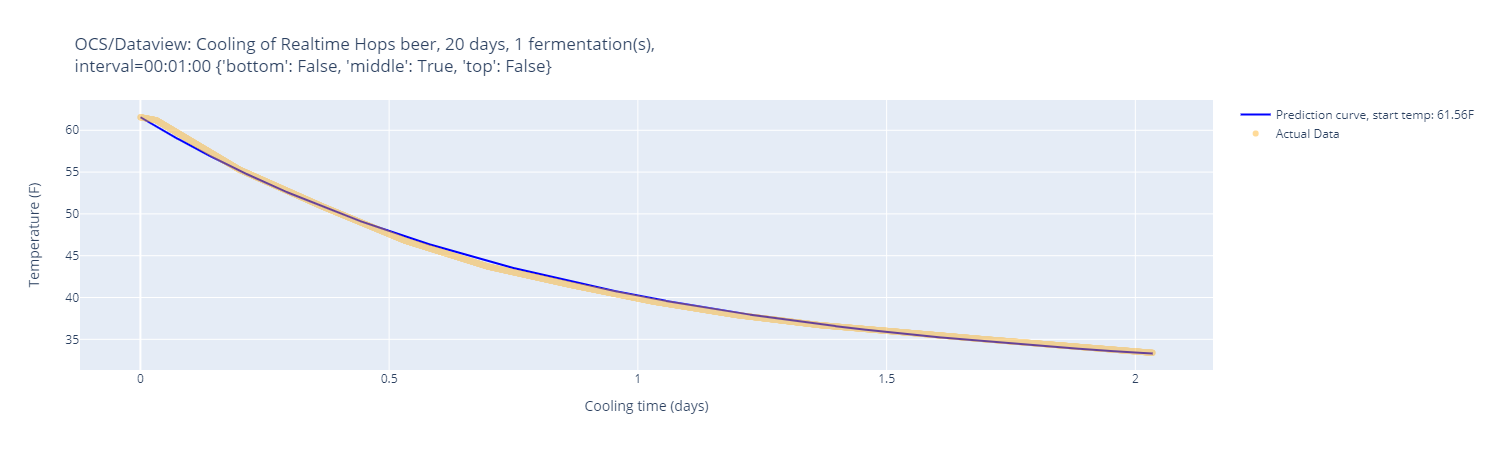

In [19]:
# Plotly object for prediction curve
prediction_trace = go.Scatter(
    x=cool_df_training["tsc"],
    y=predictions,
    mode="lines",
    name=f"Prediction curve, start temp: {T_start:5.2f}F",
    marker=dict(color="blue"),
)

# Plotly object for observed data
data_trace = go.Scatter(
    x=cool_df["tsc"],
    y=cool_df["Temperature"],
    mode="markers",
    name="Actual Data",
    opacity=0.4,
    marker=dict(color="orange"),
)

# Plotly layout
layout = go.Layout(
    xaxis=dict(title="Cooling time (days)"),
    yaxis=dict(title="Temperature (F)"),
    width=800,
    title=f"OCS/Dataview: Cooling of {BRAND} beer, {TRAINING_DAYS} days, {N_fermentations} fermentation(s),<br>"
    f"interval={INTERVAL} {TEMP_SENSORS}",
)

fig = go.Figure(data=[prediction_trace, data_trace], layout=layout)
fig.show()

**------------------ Your graph will appear above this line if no error occured ------------------**

**------------------------------------- Reference graph below -------------------------------------**
![Beer Cooling Prediction](https://academichub.blob.core.windows.net/images/nb2_solution_cooling_graph.png)

**QUESTIONS:**    

1. If the cooling data had outliers, how would you remove them?
2. How would having an erratic cooling profile affect the prediction curve? 
3. Can you use the cooling prediction curve to determine whether a given batch is out-of-spec? How would you do this?
4. Do you think you can use the cooling rate to predict the beer brand?
